# Criando janela
#tkn par ver janela

In [25]:
from tkinter import *

######## funcionalidades do sistema #############

In [26]:
import pandas as pd
import sqlite3


In [27]:
#postlate nao funciona
conexao = sqlite3.connect("Estoque.db")
#tabela_clientes = pd.read_sql(" SELECT COMANDO SQL", conexao)
#tabela_clientes = pd.read_sql("SELECT * FROM customers", conexao)
cursor=conexao.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('Estoque',), ('sqlite_sequence',)]


In [28]:
tabela_geral = pd.read_sql("SELECT * FROM Estoque", conexao)


In [29]:
tabela_geral.head(15)

,Id,Produto,Quantidade,DataValidade,Lote
0,1,Copo,2498,2050-12-30,1
1,2,Corante,2498,2024-11-15,1
2,4,Água,300,2030-10-10,2
3,5,feijao2,2498,2023-12-20,1
4,6,agua,122,2023-01-10,21
5,7,Copo,500,2050-09-10,2
6,8,Copo,1000,2050-10-10,300
7,9,Copo,5,2050-10-11,200
8,11,Pizza,35,20/08/2027,234


In [30]:
tabela_geral2 = pd.read_sql("SELECT * FROM sqlite_sequence", conexao)


In [31]:
display(tabela_geral2)

,name,seq
0,Estoque,11


In [32]:
#!pip install pyodbc

In [33]:
#import pyodbc

In [34]:
#print(pyodbc.drivers())

In [35]:
#import tkinter as tk
#from PIL import ImageTk, Image


In [36]:
from tkinter import *

######## funcionalidades do sistema #############

def adicionar_insumo():
    
    #cursor.execute(f'''
   # INSERT INTO Estoque (Produto, Quantidade, DataValidade, Lote)
   # VALUES
  #  ("{nome_insumo.get()}", {qtde_insumo.get()}, "{data_insumo.get()}", {lote_insumo.get()})
  #  ''')
    #cursor.commit()
   # conexao.commit()
    cursor.execute(f'SELECT * FROM Estoque WHERE Lote= {lote_insumo.get()} AND Produto ="{nome_insumo.get()}"')      
#    cursor.execute(f'SELECT * FROM Estoque WHERE Produto ="{nome_insumo.get()}"')   
#    cursor.execute(f'SELECT * FROM Estoque WHERE Id= {id_produto.get()} OR Produto ="{nome_insumo.get()}"')
    resultado= cursor.fetchone()


    if resultado is not None:
       #o item ja existe, atualizar a quantidade
        nova_quantidade= resultado[2]+ float(qtde_insumo.get())
        cursor.execute(f'''

        UPDATE Estoque
        SET Quantidade = {nova_quantidade} WHERE Lote={lote_insumo.get()}
        ''')
        mensagem = f'Entrada de {qtde_insumo.get()} unidades de {nome_insumo.get()} registrada com sucesso!'
        conexao.commit()
        print('entrei na soma')
        # deletar tudo da caixa de texto
        caixa_texto.delete("1.0", END)

        # escrever na caixa de texto
       # caixa_texto.insert("1.0", "Texto")
        caixa_texto.insert("1.0", f"entrei na soma")
    
    else: 
        # o item nao existe, inserir um novo registro
        cursor.execute(f'''
        INSERT INTO Estoque (Produto, Quantidade, DataValidade, Lote)
        VALUES
        ("{nome_insumo.get()}", {qtde_insumo.get()}, "{data_insumo.get()}", {lote_insumo.get()})
        ''')
        #cursor.commit()
        conexao.commit()



    print(caixa_texto.get('1.0', END))
    print(nome_insumo.get())
    print(data_insumo.get())
    print(lote_insumo.get())
    print(qtde_insumo.get())
    
    # deletar tudo da caixa de texto
    caixa_texto.delete("1.0", END)
    
    # escrever na caixa de texto
   # caixa_texto.insert("1.0", "Texto")
    caixa_texto.insert("1.0", f"Insumo {nome_insumo.get()} adcionado com sucesso")
    
def deletar_insumo():
    if len(nome_insumo.get()) < 2:
        #exibir uma mensagem -> nome insumo inválido
        #finalizar a função
        
        
        # deletar tudo da caixa de texto
        caixa_texto.delete("1.0", END)
        # escrever na caixa de texto
        # caixa_texto.insert("1.0", "Texto")
        caixa_texto.insert("1.0", f"Nome do Insumo inválido")
        return

    #deletar o insumo  com duas opcoes
   #  DELETE FROM TABELA WHERE Produto= "{nome_insumo.get()}" AND Lote = "{lote_insumo.get()}"
   # cursor.execute('''DELETE FROM Estoque WHERE coluna= algum_valor  "{copo}"''')
   # cursor.commit()

    #cursor.execute(f'''
   # DELETE FROM Estoque WHERE Produto= "{nome_insumo.get()}"
   # ''')
    #conexao.commit()    
    cursor.execute(f'''
    DELETE FROM Estoque WHERE Produto= "{nome_insumo.get()}"  AND Lote = "{lote_insumo.get()}"
    ''')
    conexao.commit()   
    
    
    # deletar tudo da caixa de texto
    caixa_texto.delete("1.0", END)
    # escrever na caixa de texto
    # caixa_texto.insert("1.0", "Texto")
    caixa_texto.insert("1.0", f"Insumo {nome_insumo.get()} deletado com sucesso")    
    print("deletar_insumo")
     

    

def consumir_insumo():
    

#quero ver qual lote consumo
    if len(nome_insumo.get()) < 2 or len(lote_insumo.get())<1 or len(qtde_insumo.get())<1:
        #exibir uma mensagem -> nome insumo inválido
        #finalizar a função
        
        
        # deletar tudo da caixa de texto
        caixa_texto.delete("1.0", END)
        # escrever na caixa de texto
        # caixa_texto.insert("1.0", "Texto")
        caixa_texto.insert("1.0", f"Nome, Lote e Quantidade do Insumo inválido")
        return

    #consumir o insumo  com duas opcoes
   #  DELETE FROM TABELA WHERE Produto= "{nome_insumo.get()}" AND Lote = "{lote_insumo.get()}"
   # cursor.execute('''DELETE FROM Estoque WHERE coluna= algum_valor  "{copo}"''')
   # cursor.commit()

    #cursor.execute(f'''
   # DELETE FROM Estoque WHERE Produto= "{nome_insumo.get()}"
   # ''')
    #conexao.commit()
# SET Quantidade=Quantidade-10, diminuir  a quantidade do insumo {qtde_insumo.get()} 
    cursor.execute(f'''
    UPDATE Estoque 
    SET Quantidade=Quantidade-{qtde_insumo.get()} 
    WHERE Produto= "{nome_insumo.get()}"  AND Lote = {lote_insumo.get()}
    ''')
    conexao.commit()   
    
    
    # deletar tudo da caixa de texto
    caixa_texto.delete("1.0", END)
    # escrever na caixa de texto
    # caixa_texto.insert("1.0", "Texto")
    caixa_texto.insert("1.0", f"Insumo {nome_insumo.get()} foi consumido em {qtde_insumo.get()} unidades")  
    print("consumir_insumo")

def visualizar_insumo():   
    
#fazer uma consulta no banco de dados
    if len(nome_insumo.get())<2 :
        #exibir uma mensagem -> nome insumo inválido
        #finalizar a função
        
        
        # deletar tudo da caixa de texto
        caixa_texto.delete("1.0", END)
        # escrever na caixa de texto
        # caixa_texto.insert("1.0", "Texto")
        caixa_texto.insert("1.0", f"Nome do Insumo inválido")
        return
#pesquisar pelo insumo
    #cursor.execute("SELECT * FROM Estoque WHERE Produto=Nome_do_produto")
   # cursor.execute(f"SELECT * FROM Estoque WHERE Produto='{nome_insumo.get()}'")
    cursor.execute(f'SELECT * FROM Estoque WHERE Produto="{nome_insumo.get()}"')
    
    valores= cursor.fetchall()
   #lista com varias tuplas valores=[(1,Copo, 4855,'2050-12-10',2),(),(4,Copo, 450, '2050-10-10',2)]


    texto=""
    #for tupla in valores: 
    for id_produto, nome, quantidade, validade, lote in valores:
        
        texto= texto +  f'''
        -----
        Produto:{nome}
        Quantidade:{quantidade}
        Validade:{validade}
        Lote:{lote}


        '''
    # deletar tudo da caixa de texto
    caixa_texto.delete("1.0", END)
    # escrever na caixa de texto
    # caixa_texto.insert("1.0", "Texto")
    caixa_texto.insert("1.0", f"Insumo Visualizar \n {texto}")  
        
        
    print("visualizar_insumo")

    
    
######### criação da Janela ##################
    
window = Tk()

window.geometry("711x646")
window.configure(bg = "#ffffff")
canvas = Canvas(
    window,
    bg = "#ffffff",
    height = 646,
    width = 711,
    bd = 0,
    highlightthickness = 0,
    relief = "ridge")
canvas.place(x = 0, y = 0)

background_img = PhotoImage(file = f"janela/background.png")
background = canvas.create_image(
    355.5, 323.0,
    image=background_img)

img0 = PhotoImage(file = f"janela/img0.png")
b0 = Button(
    image = img0,
    borderwidth = 0,
    highlightthickness = 0,
    command = visualizar_insumo,
    relief = "flat")

b0.place(
    x = 479, y = 195,
    width = 178,
    height = 38)

img1 = PhotoImage(file = f"janela/img1.png")
b1 = Button(
    image = img1,
    borderwidth = 0,
    highlightthickness = 0,
    command = deletar_insumo,
    relief = "flat")

b1.place(
    x = 247, y = 197,
    width = 178,
    height = 36)

img2 = PhotoImage(file = f"janela/img2.png")
b2 = Button(
    image = img2,
    borderwidth = 0,
    highlightthickness = 0,
    command = consumir_insumo,
    relief = "flat")

b2.place(
    x = 479, y = 123,
    width = 178,
    height = 35)

img3 = PhotoImage(file = f"janela/img3.png")
b3 = Button(
    image = img3,
    borderwidth = 0,
    highlightthickness = 0,
    command = adicionar_insumo,
    relief = "flat")

b3.place(
    x = 247, y = 125,
    width = 178,
    height = 34)

entry0_img = PhotoImage(file = f"janela/img_textBox0.png")
entry0_bg = canvas.create_image(
    455.0, 560.0,
    image = entry0_img)

caixa_texto = Text(
    bd = 0,
    bg = "Black",
    highlightthickness = 0)

caixa_texto.place(
    x = 250, y = 502,
    width = 410,
    height = 114)

entry1_img = PhotoImage(file = f"janela/img_textBox1.png")
entry1_bg = canvas.create_image(
    517.0, 294.5,
    image = entry1_img)

nome_insumo = Entry(
    bd = 0,
    bg = "Black",
    highlightthickness = 0)

nome_insumo.place(
    x = 377, y = 278,
    width = 280,
    height = 31)

entry2_img = PhotoImage(file = f"janela/img_textBox2.png")
entry2_bg = canvas.create_image(
    517.0, 340.5,
    image = entry2_img)

data_insumo = Entry(
    bd = 0,
    bg = "Black",
    highlightthickness = 0)

data_insumo.place(
    x = 377, y = 324,
    width = 280,
    height = 31)

entry3_img = PhotoImage(file = f"janela/img_textBox3.png")
entry3_bg = canvas.create_image(
    517.0, 388.5,
    image = entry3_img)

lote_insumo = Entry(
    bd = 0,
    bg = "Black",
    highlightthickness = 0)

lote_insumo.place(
    x = 377, y = 372,
    width = 280,
    height = 31)

entry4_img = PhotoImage(file = f"janela/img_textBox4.png")
entry4_bg = canvas.create_image(
    517.0, 436.5,
    image = entry4_img)

qtde_insumo = Entry(
    bd = 0,
    bg = "Black",
    highlightthickness = 0)

qtde_insumo.place(
    x = 377, y = 420,
    width = 280,
    height = 31)

window.resizable(False, False)
window.mainloop()



Pizza
2037-08-20
33
35
deletar_insumo





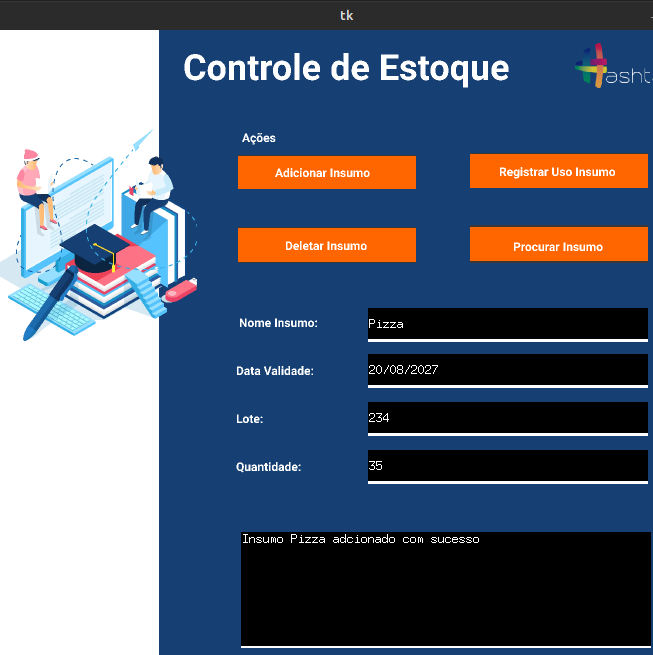

In [37]:
#sudo apt-get install python3-tk
#!pip install pyimage4
#botao com funcao especifica, reinicio pelo kernel, para funcionar

In [38]:

#campo entry para descrever ou preencher dados do site
#caixa de texto text
#1.0 entra e o final END

In [39]:
#indice linha 1  e indice da coluna 0 e 1.0

In [40]:
#mainloop, loop infinito, para sair tem que fechar a janela

In [41]:
cursor.close()
conexao.close()




tkinter
window = TK()
caixa_texto

variaveis globais

dentro da funcao, so existe dentro de uma funcao
depois programar orientado objeto

digitar
copo
15-02-2030
1
10


Água

2030-10-10


2


300

In [42]:
#postlate nao funciona
conexao = sqlite3.connect("Estoque.db")
#tabela_clientes = pd.read_sql(" SELECT COMANDO SQL", conexao)
#tabela_clientes = pd.read_sql("SELECT * FROM customers", conexao)
cursor=conexao.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('Estoque',), ('sqlite_sequence',)]


In [43]:
tabela_geralnovo = pd.read_sql("SELECT * FROM sqlite_sequence", conexao)


In [44]:
display(tabela_geralnovo)

,name,seq
0,Estoque,12


In [45]:
tabela_geralnew = pd.read_sql("SELECT * FROM Estoque", conexao)


In [46]:
tabela_geralnew

,Id,Produto,Quantidade,DataValidade,Lote
0,1,Copo,2498,2050-12-30,1
1,2,Corante,2498,2024-11-15,1
2,4,Água,300,2030-10-10,2
3,5,feijao2,2498,2023-12-20,1
4,6,agua,122,2023-01-10,21
5,7,Copo,500,2050-09-10,2
6,8,Copo,1000,2050-10-10,300
7,9,Copo,5,2050-10-11,200
8,12,Pizza,35,2037-08-20,33


In [47]:
conexao.close()

Tela preta



nome_isumo= Entry(
bd=0,
bg="black",
highlightthickness=0)
